In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
airp = pd.read_csv(r'C:\Users\risha\case_study\AirPassengers.csv')

In [3]:
airp.columns = ['Year','Passengers']
airp.head()

,Year,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
airp.shape

(144, 2)

In [5]:
airp.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
airp.dtypes

Year          object
Passengers     int64
dtype: object

In [7]:
airp['Year'] = pd.to_datetime(airp['Year'])

In [8]:
print('Starting time',airp['Year'].min())
print('Ending time',airp['Year'].max())

Starting time 1949-01-01 00:00:00
Ending time 1960-12-01 00:00:00


In [9]:
airp = airp.set_index('Year')
airp.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Year', length=144, freq=None)

In [10]:
airp.head()

,Passengers
Year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


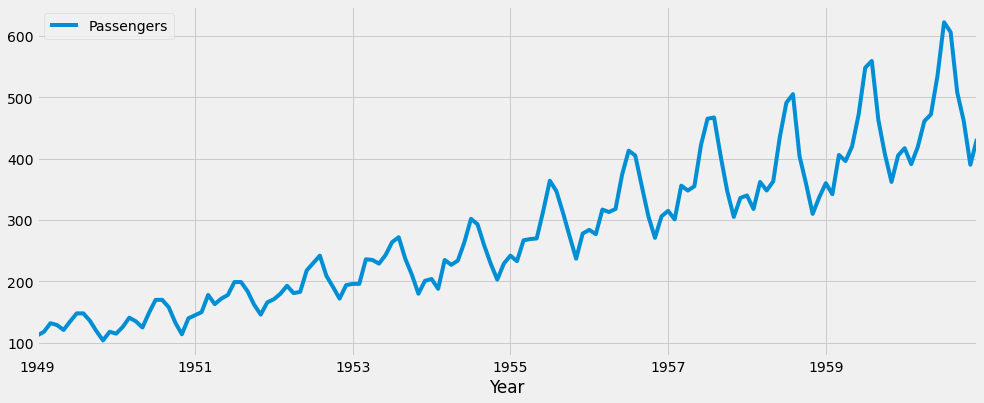

In [11]:
plt.style.use('fivethirtyeight')
airp.plot(figsize=(15,6))
plt.show()

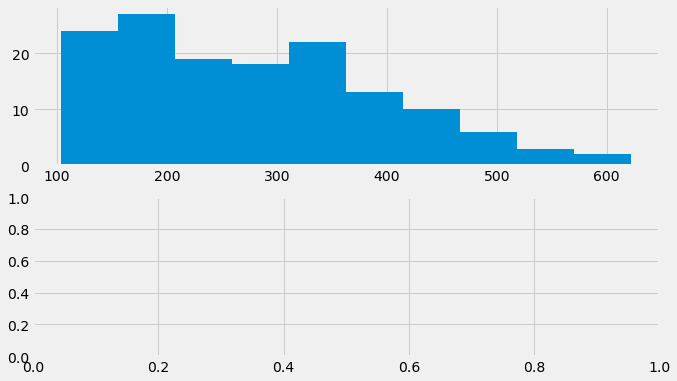

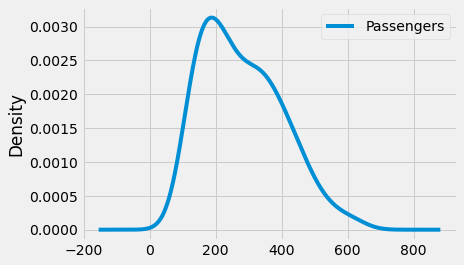

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(211)
airp.Passengers.hist()

plt.subplot(212)
airp.plot(kind='kde')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

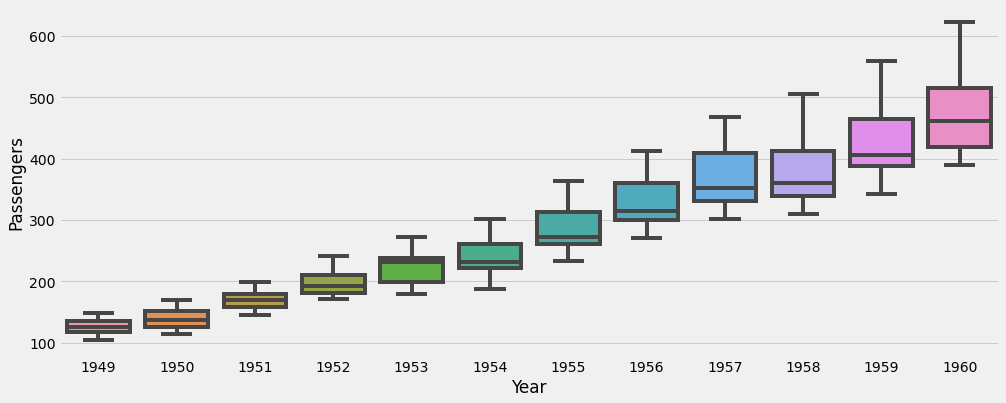

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(airp.Passengers.index.year,airp.Passengers)

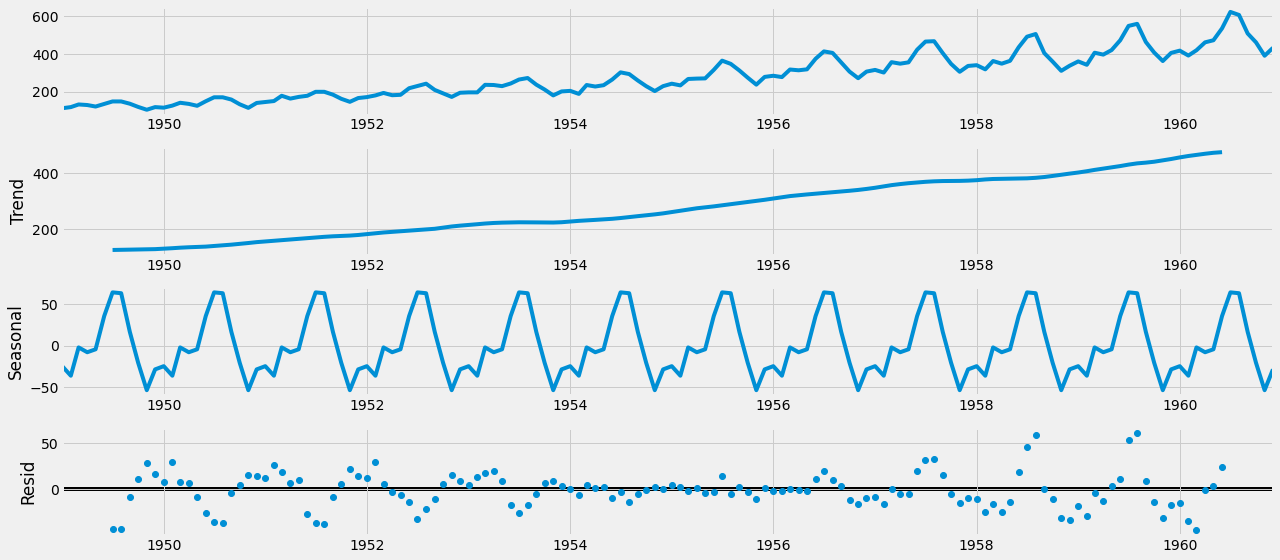

In [14]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(airp,model='addictive')
fig = decomposition.plot()
plt.show()

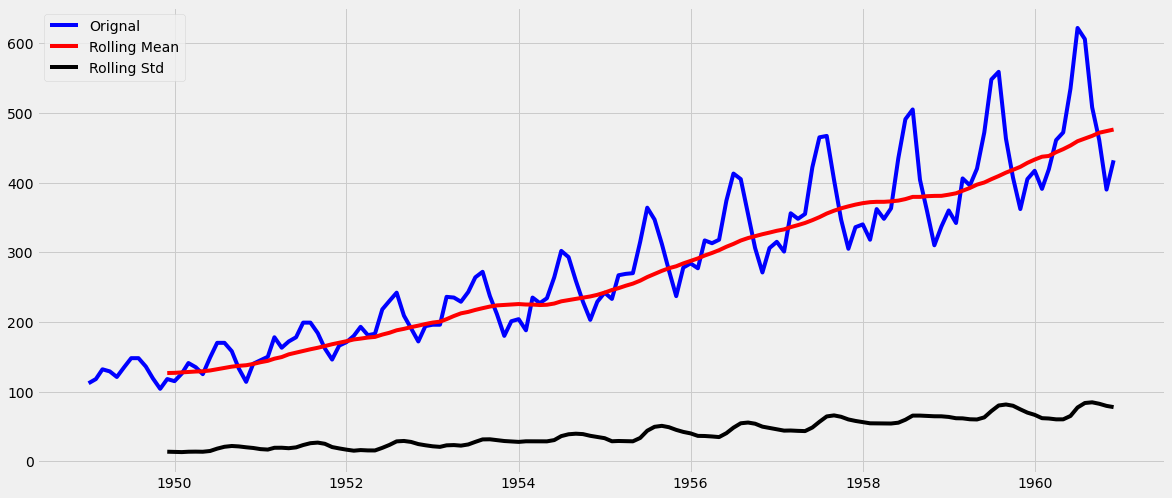

In [15]:
#Rolling Statisics

rollmean = airp.rolling(window=12).mean()
rollstd = airp.rolling(window=12).std()

orig = plt.plot(airp,color='blue',label='Orignal')
orig = plt.plot(rollmean,color='red',label='Rolling Mean')
orig = plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend()

In [16]:
#Adfuller Test
#Null Hypothesis that my time series in stationary
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(airp['Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistics                  0.815369
p-value                          0.991880
Lag Used                        13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
def test_stationary(timeseries):
    rollmean = timeseries.rolling(window=12).mean()
    rollstd = timeseries.rolling(window=12).std()

    orig = plt.plot(timeseries,color='blue',label='Orignal')
    orig = plt.plot(rollmean,color='red',label='Rolling Mean')
    orig = plt.plot(rollstd,color='black',label='Rolling Std')
    plt.legend()
    
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [18]:
#Trend : Moving Avegerage
#Seasonality : Log

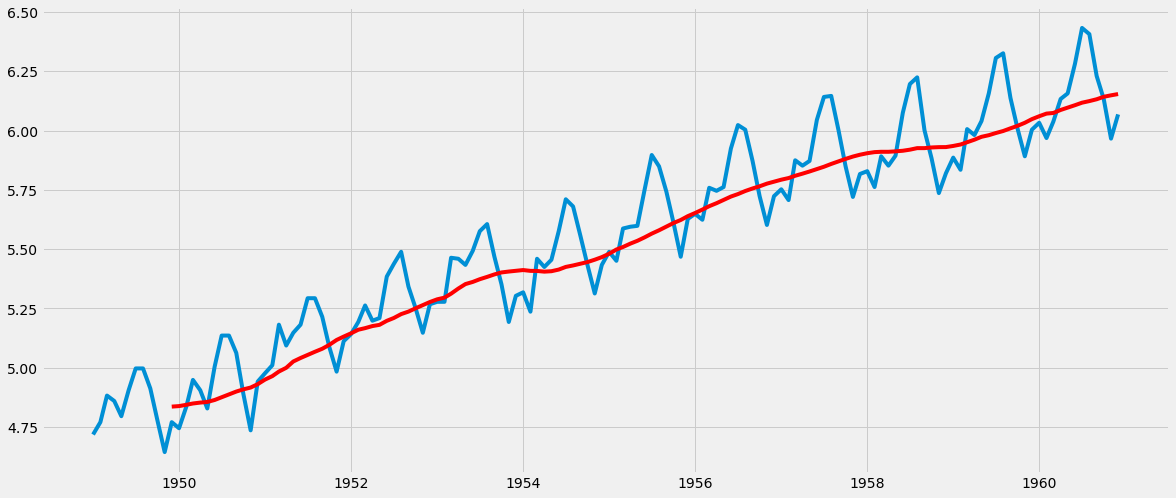

In [19]:
ts_log = np.log(airp)

moving_average = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_average,color='red')

In [20]:
ts_log_moving_average = ts_log.Passengers - moving_average.Passengers
ts_log_moving_average.head()

Year
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Passengers, dtype: float64

Results of Dickey-Fuller Test
Test Statistics                 -3.162908
p-value                          0.022235
Lag Used                        13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


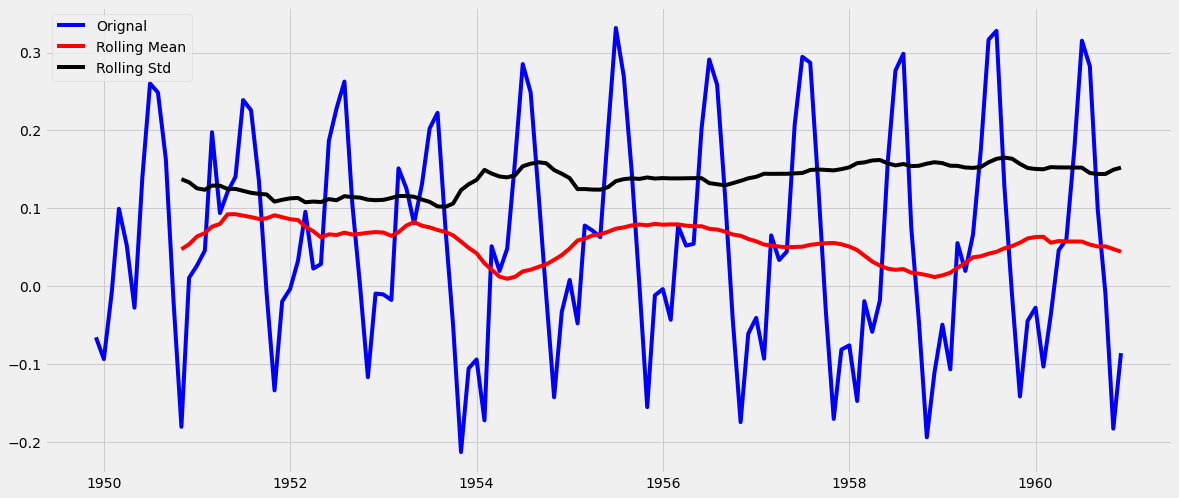

In [21]:
ts_log_moving_average.dropna(inplace=True)
test_stationary(ts_log_moving_average)

Results of Dickey-Fuller Test
Test Statistics                 -3.601262
p-value                          0.005737
Lag Used                        13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


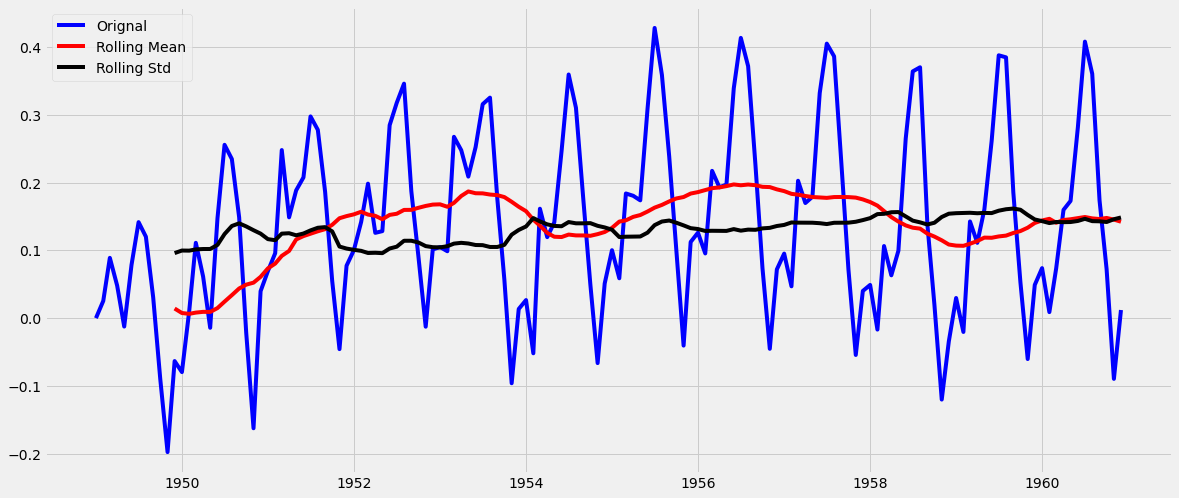

In [22]:
exp_moving_log = ts_log.ewm(halflife=12).mean()
ts_log_ewm = ts_log.Passengers - exp_moving_log.Passengers

ts_log_ewm.dropna(inplace=True)
test_stationary(ts_log_ewm)

In [27]:
from statsmodels.tsa.ar_model import AR
model = AR(ts_log_ewm)
result = model.fit()

C:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


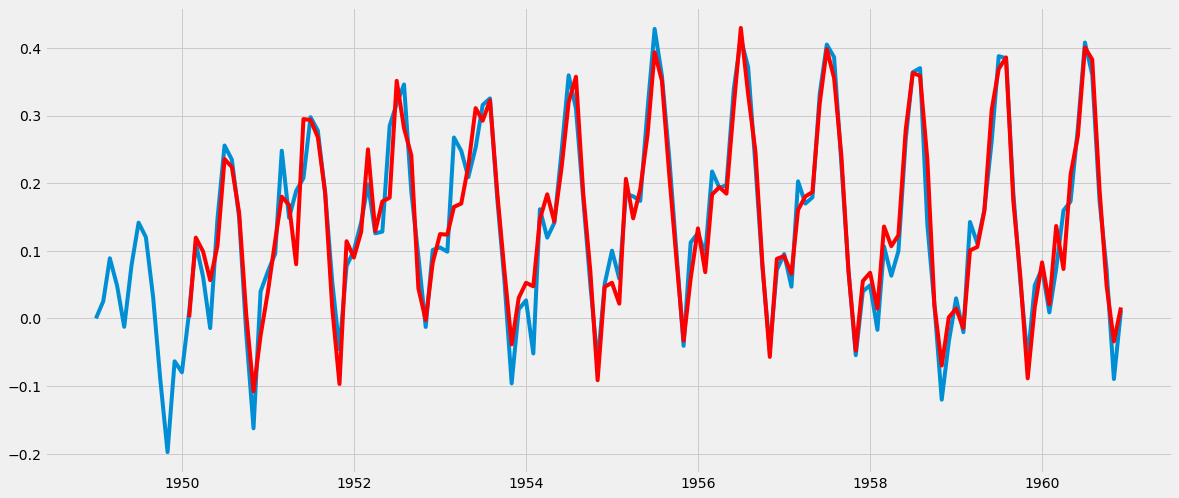

In [29]:
plt.plot(ts_log_ewm)
plt.plot(result.fittedvalues,color='red')
plt.show()

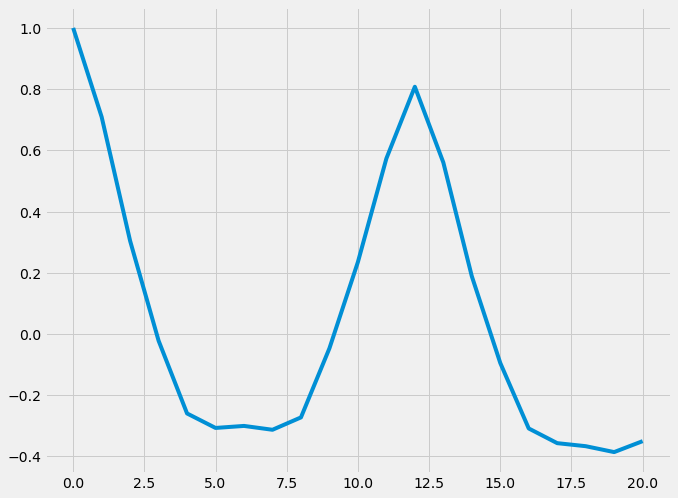

In [41]:
from statsmodels.tsa.stattools import acf,pacf
plt.figure(figsize=(10,8))
lag_acf = acf(ts_log_ewm,nlags=20)
lag_pacf = pacf(ts_log_ewm,nlags=20)

plt.plot(lag_acf)

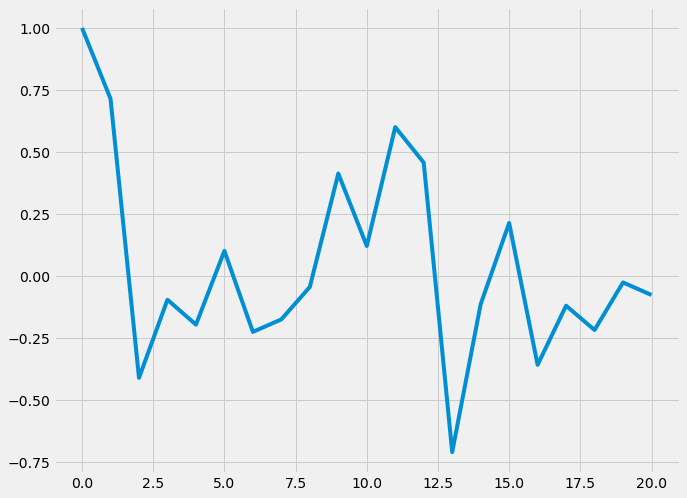

In [42]:
plt.figure(figsize=(10,8))
plt.plot(lag_pacf)

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log_ewm,order=(2,1,2))
results = model.fit()

C:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


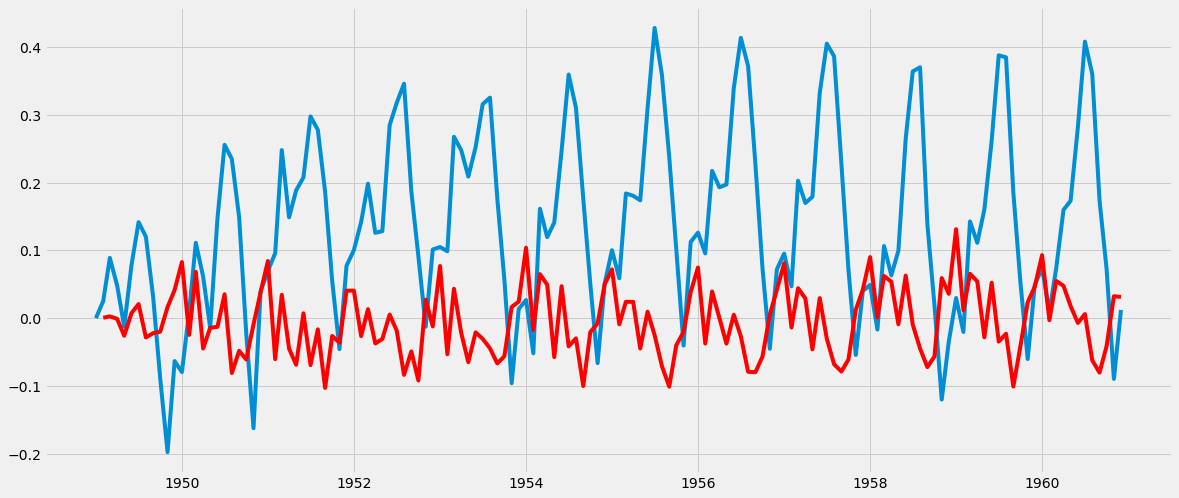

In [57]:
plt.plot(ts_log_ewm)
plt.plot(results.fittedvalues,color='red')
plt.show()